## LESSON 02: FUNDAMENTALS OF ML AND STATISTICAL LEARNING

### 1. Metadata  
- **Gender**: Categorical data indicating gender (male or female).
- **Height (in)**: A numeric value indicating height in inches.
- **Weight (lb)**: A numeric value indicating weight in pounds.
- **Age (lb)**: A numeric value indicating age in years.
- **BMI (BMI)**: A numeric value calculated based on height and weight.
- **BPM Day 1/2/3 (HR Day 1/2/3)**: Numerical values indicating heart rate in beats per minute for three different days.
- **Session Duration (hours)**: A numeric value indicating the duration of a workout in hours.
- **Calories Burned (Whole No.)**: An integer value indicating the number of calories burned per session.
- **Workout Type**: Categorical data describing the type of workout (e.g., cardio or strength training).
- **% Fat Percentage**: A numeric value indicating the percentage of body fat.
- **Water Intake (litres)**: A numeric value indicating the daily water intake in litres.
- **Words/Minute (W/M)**: An integer value indicating the number of words typed per minute, possibly as an indicator of activity outside of exercise.
- **Frequency (days/week)**: An integer indicating how many days per week a person works out.
- **Experience Level**: An integer likely indicating the level of experience in training.

Translated with DeepL.com (free version)

In [75]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [76]:
# Define the column names as a list
column_names = ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM','Session_Duration (hours)',
                'Calories_Burned','Workout_Type','Fat_Percentage','Water_Intake (liters)','Workout_Frequency (days/week)','Experience_Level','BMI']

### 2. Load Dataset

In [86]:
dataset = pd.read_csv("gym_members_exercise_tracking.csv", names = column_names, sep = ",", skipinitialspace=True)
dataset = dataset.drop(index=0)
dataset.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
1,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.2
2,46,Female,74.9,1.53,179,151,66,1.3,883.0,HIIT,33.9,2.1,4,2,32.0
3,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
4,25,Male,53.2,1.7,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
5,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [87]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  973
#Features =  15


In [88]:
# checking the missing values
dataset[dataset.eq("?").any(axis=1)].head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI


In [89]:
# replace data with '?' by NaN
dataset.replace("?", np.nan, inplace=True)
dataset[dataset.isna().any(axis=1)].head()
print("#Samples with missing values = ", len(dataset[dataset.isna().any(axis=1)]))

#Samples with missing values =  0


Filtering missing values

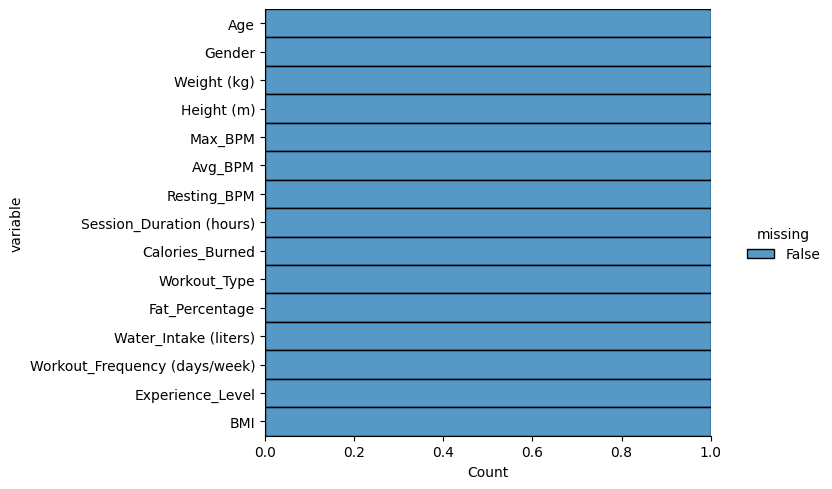

In [90]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

In [91]:
dataset = dataset.dropna()
print("#Total samples without missing values = ", len(dataset))

#Total samples without missing values =  973


### 3. Descriptive Statistical Analysis

#### Numerical variables

In [98]:
# list of numerical variables 
numerical_cols = ['Weight (kg)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Experience_Level']


Histogram with Frequencies

In [99]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)    
    plt.show()

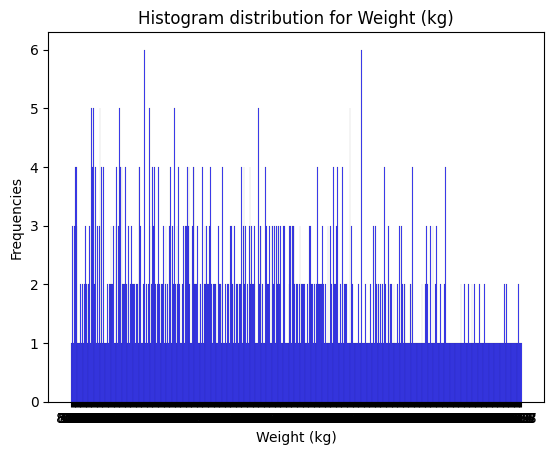

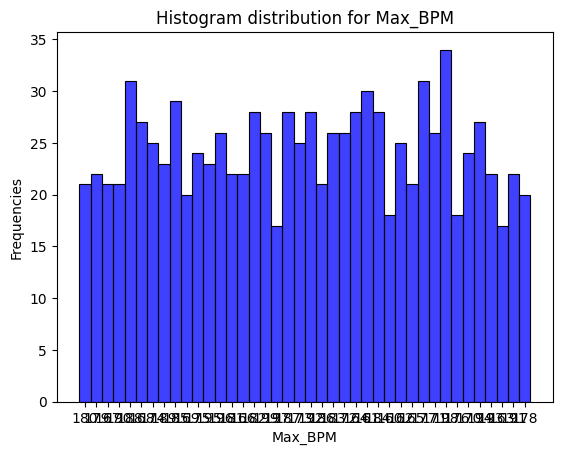

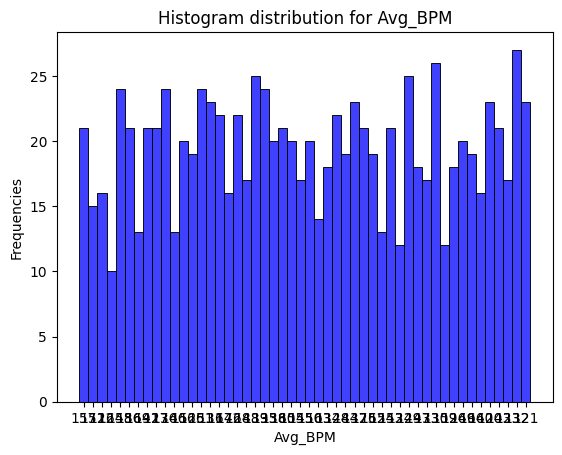

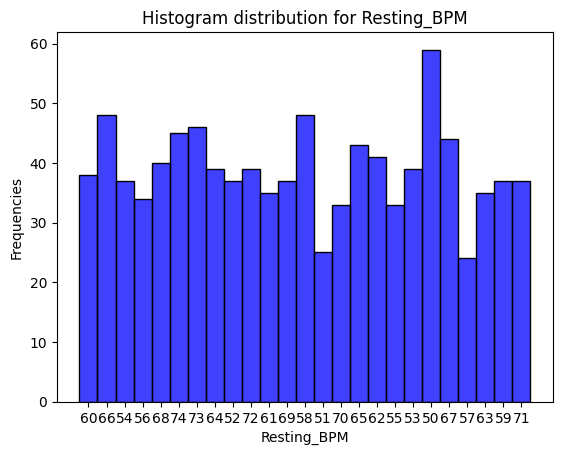

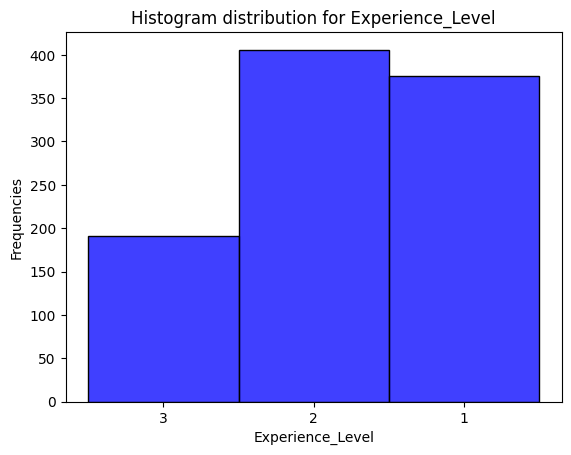

In [100]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10)

Histogram with Densities and KDE line (kernel density estimate)

The Kernel Density Estimator provides a smooth curve that represents the distribution of data points based on estimating the probability density function of a random variable:  
$$ \hat{f}(x; h) = \frac{1}{n} \sum_{i=1}^{n} K_h(x - X_i) $$  
Where:  
* n: total number of data points
* $X_i$: observed data points
* $K_h$: kernel function scaled by the bandwidth h
$$ K_h(z) = \frac{1}{h} K\left(\frac{z}{h}\right) $$ 
* $K$: Gaussian Kernel  
$$ K(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} $$

In [101]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)    
    plt.show()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

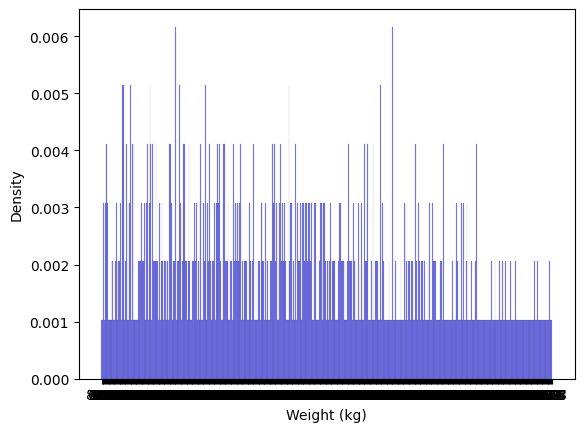

In [102]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

Box Plot

In [103]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 3
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

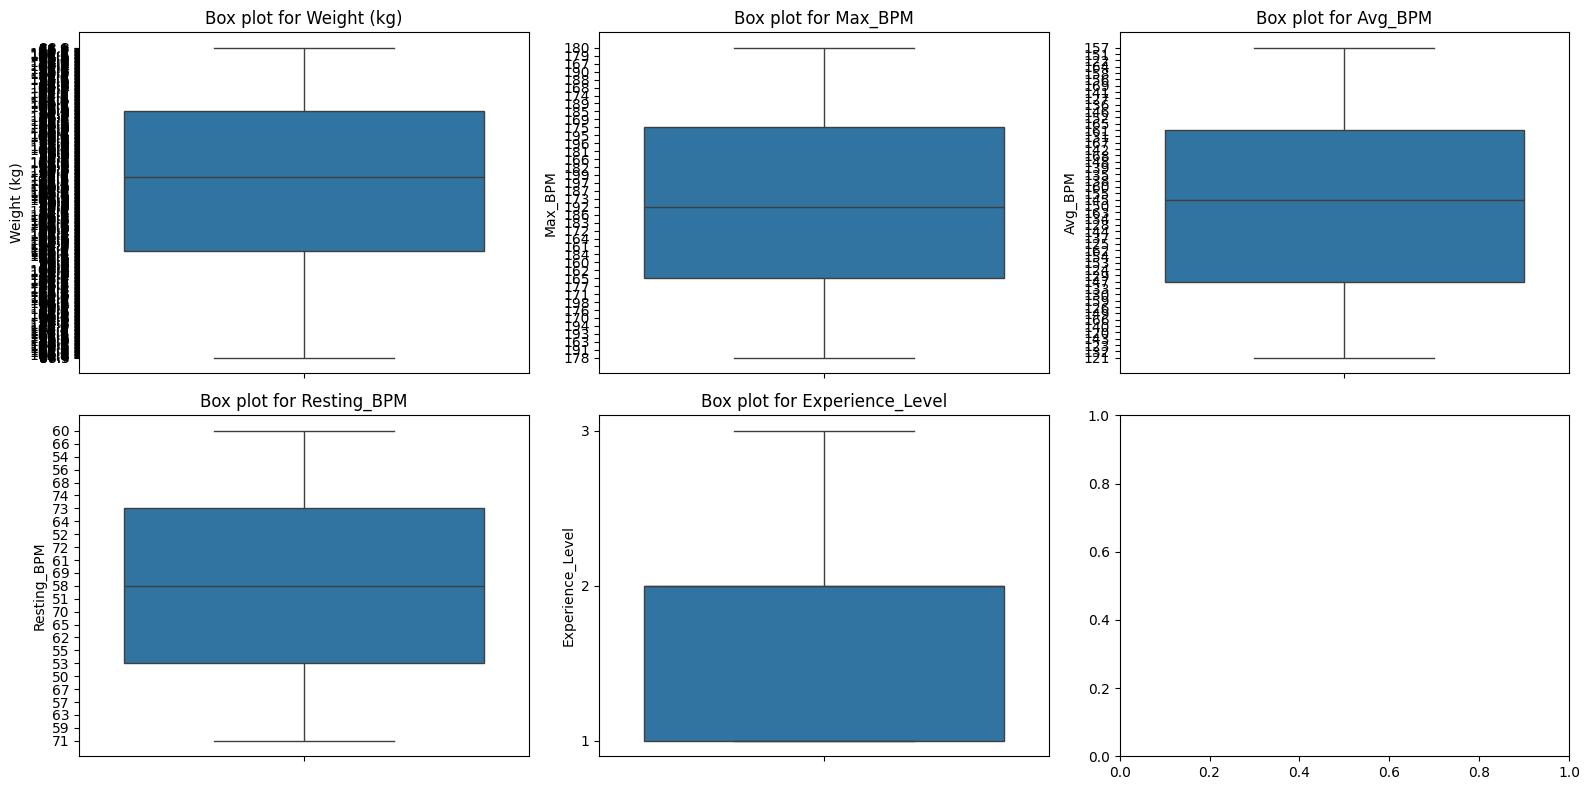

In [104]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

Statistical metrics

In [105]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,Weight (kg),Max_BPM,Avg_BPM,Resting_BPM,Experience_Level
count,973,973,973,973,973
unique,532,40,50,25,3
top,57.7,198,132,50,2
freq,6,34,27,59,406


Correlation Analysis

The correlation between 2 variables quantify the linear relationship between the variables X and Y:  
$$ r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$   
Where:  
  
$r$: pearson correlation coefficient  
$Cov(x, y)$: covariance between variables X and Y. It measures how much the two variables change together.  
$\sigma_X, \sigma_Y$: standard deviations for variables X and Y.  

Formula of Covariance:  
$$ \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$  
Formula for standard deviation for X:  
$$ \sigma_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2} $$  
Formula for standard deviation for Y:  
$$ \sigma_Y = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2} $$  

In [106]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

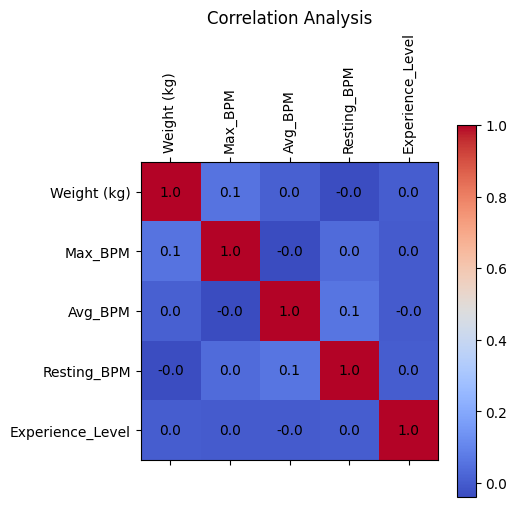

In [107]:
plot_correlation(dataset, numerical_cols)

Implications of Low Correlation

- **Independence of Features**:  
Low correlation suggests that the features are likely independent of each other. 
This can be beneficial because independent features provide unique information to the model, which can improve its performance.
- **Feature Redundancy**:   
When features are not correlated, it reduces the risk of redundancy. 
Including redundant features (highly correlated) can lead to issues like multicollinearity, making it difficult to interpret the model and possibly degrading its performance.
- **Model Complexity**:  
Low correlation may indicate that the model needs to learn more complex relationships to make accurate predictions. 
If features do not provide overlapping information, the model may require more sophisticated techniques (like polynomial regression or interaction terms) to capture the underlying patterns.
- **Feature Selection**:  
In some cases, low-correlation features might be candidates for removal if they do not contribute significantly to the predictive power of the model. 

**Outliers detection using Z-Score**  
The Z-score is the number of standard deviations from the mean that a data point is.  
The formula for the Z-score is:  
$$ Z = \frac{x - \mu}{\sigma} $$

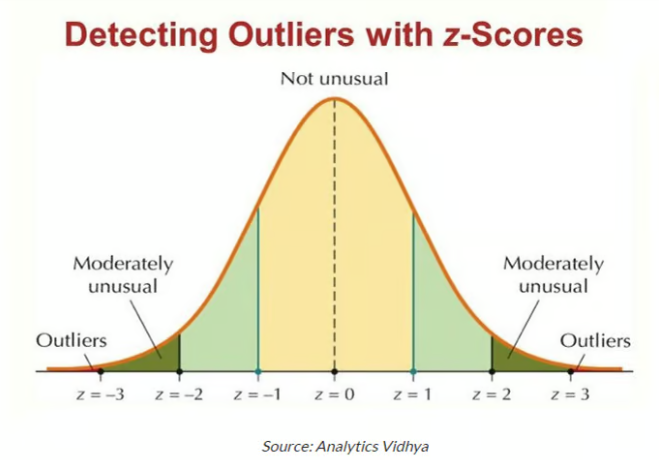

In [108]:
# function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):    
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)
    
    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

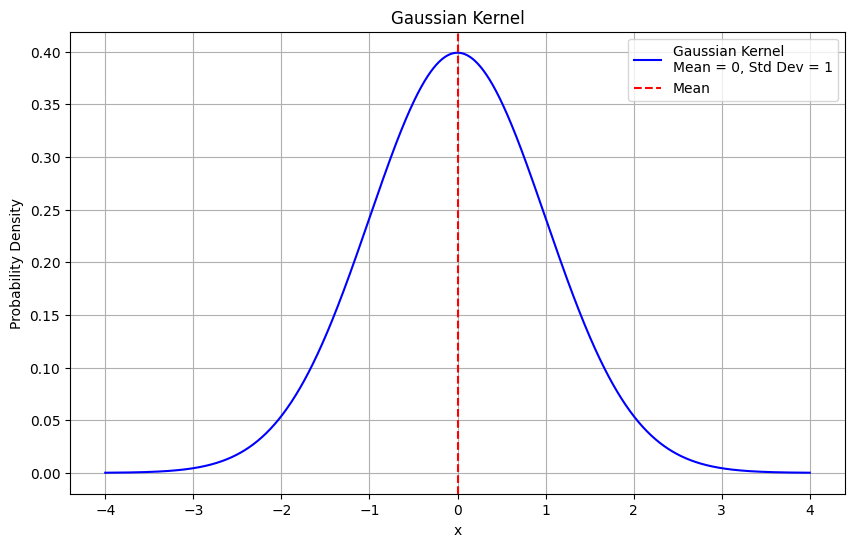

In [109]:
# standard gaussian kernel
plot_gaussian_kernel(mean=0, std_dev=1)

In [112]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile


In [113]:
call_percentile(z = -2)

2.275

In [114]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    return outliers

In [ ]:
outliers_detection(dataset, "Age").head()


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [116]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in Weight (kg) ***


TypeError: unsupported operand type(s) for -: 'str' and 'str'

#### Categorical Variables

In [123]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['Age',
 'Workout_Frequency (days/week)',
 'Height (m)',
 'Workout_Type',
 'Session_Duration (hours)',
 'Fat_Percentage',
 'Calories_Burned',
 'Gender',
 'Water_Intake (liters)',
 'BMI']

Count instances for each categorical column

In [124]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** Age ******
Age
43    34
50    33
52    32
45    30
54    30
18    27
42    27
22    27
56    27
25    26
19    26
49    26
41    26
23    25
40    25
20    25
31    24
34    24
29    23
47    23
39    23
57    23
28    23
53    23
32    21
46    21
33    21
36    21
26    21
38    20
21    20
37    19
58    19
59    19
30    19
51    19
55    18
27    18
35    17
48    17
44    16
24    15
Name: count, dtype: int64

***** Workout_Frequency (days/week) ******
Workout_Frequency (days/week)
3    368
4    306
2    197
5    102
Name: count, dtype: int64

***** Height (m) ******
Height (m)
1.62    44
1.76    37
1.77    37
1.61    36
1.79    32
1.68    31
1.71    30
1.63    29
1.72    28
1.6     27
1.74    27
1.75    26
1.67    26
1.69    26
1.66    25
1.65    24
1.52    22
1.64    22
1.78    22
1.58    20
1.55    20
1.86    20
1.57    18
1.8     18
1.7     18
1.73    16
1.87    16
1.99    15
1.92    15
1.59    15
1.85    15
1.93    14
1.53    14
1.56    14
1.95    14
1.94    12
1.82  

Bar chart - Analysis of absolute frequencies

In [125]:
# function to plot distribution for 1 categorical column
def plot_count_categories(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

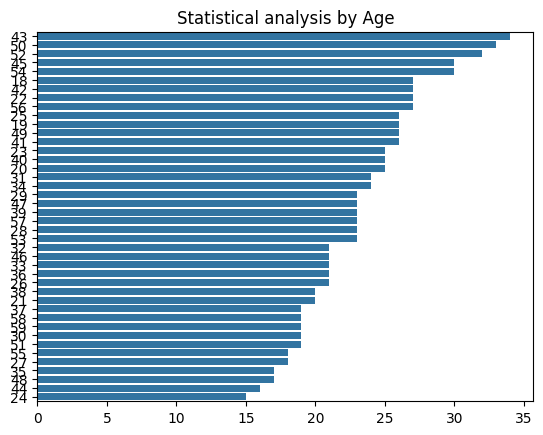

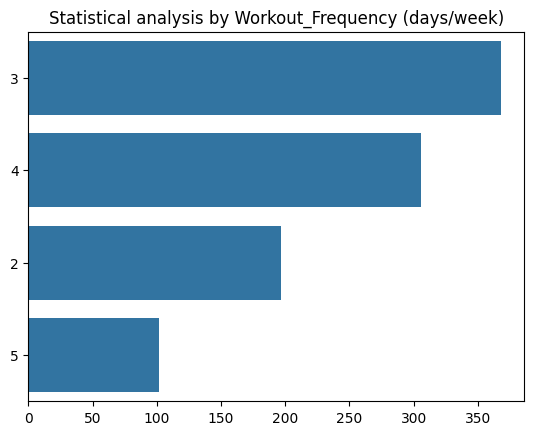

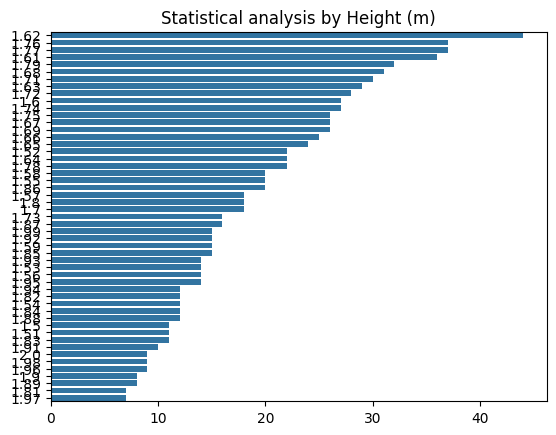

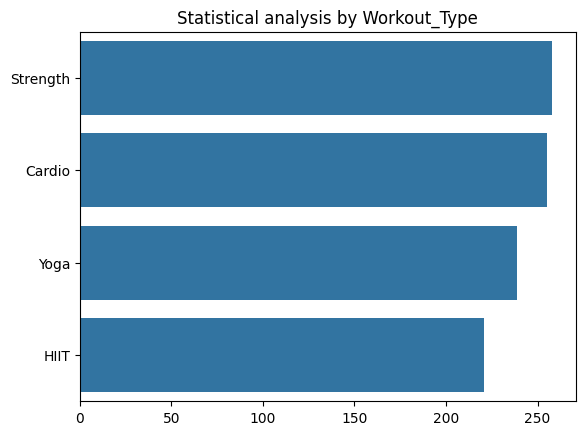

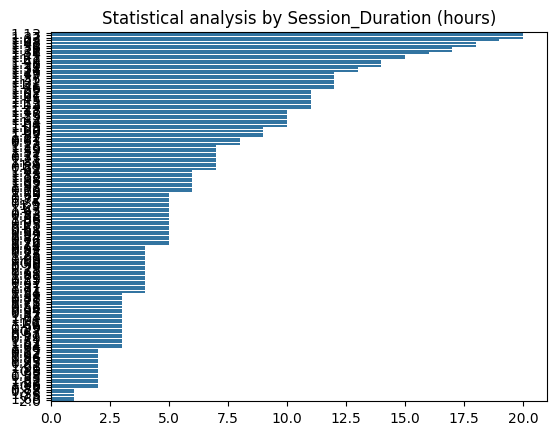

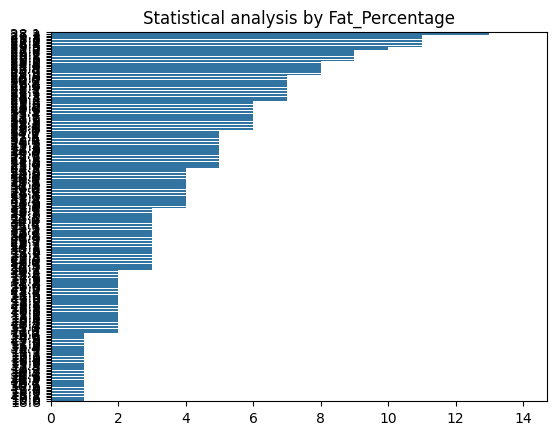

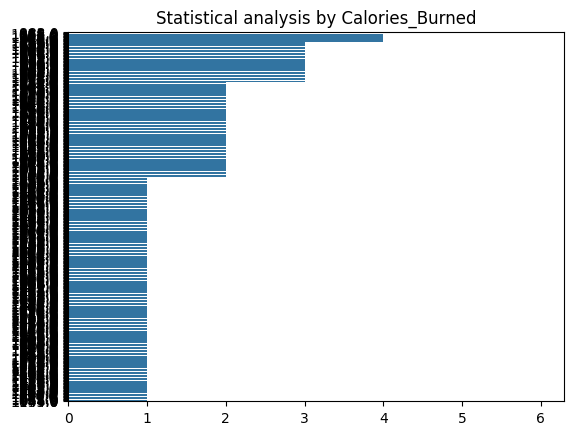

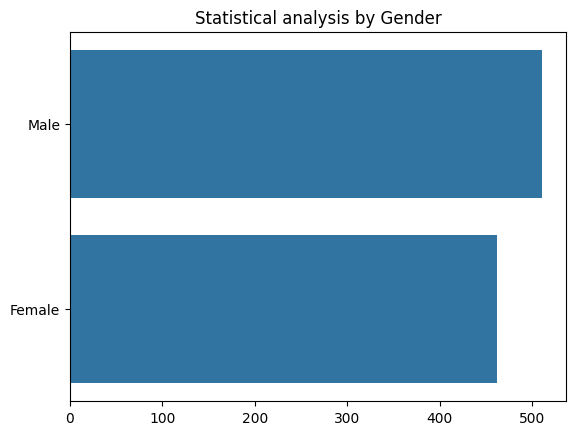

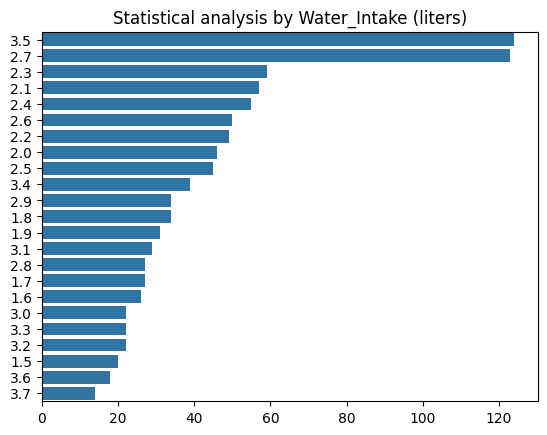

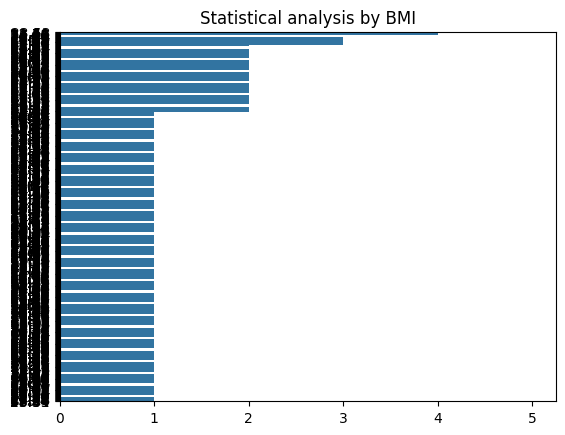

In [126]:
# cycle to plot distribution for each categorical column
for col in categorical_vars:
    plot_count_categories(dataset, col)

Pie Chart - Analysis of relative frequencies

In [128]:
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

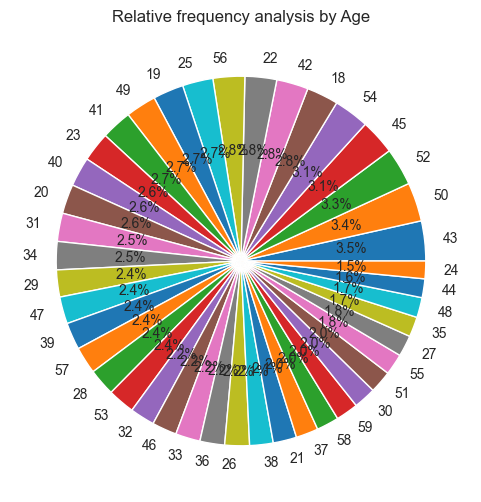

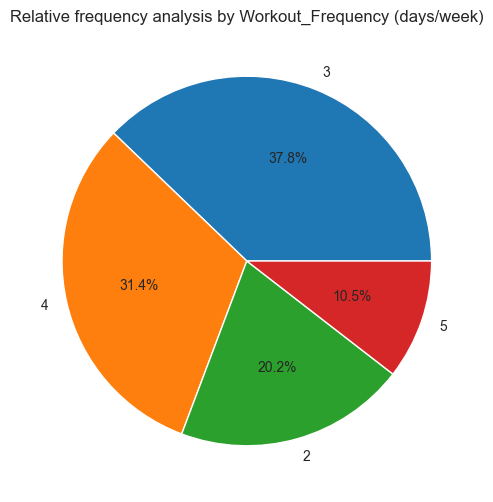

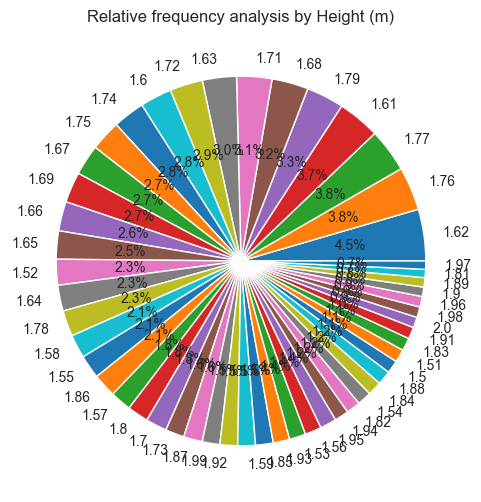

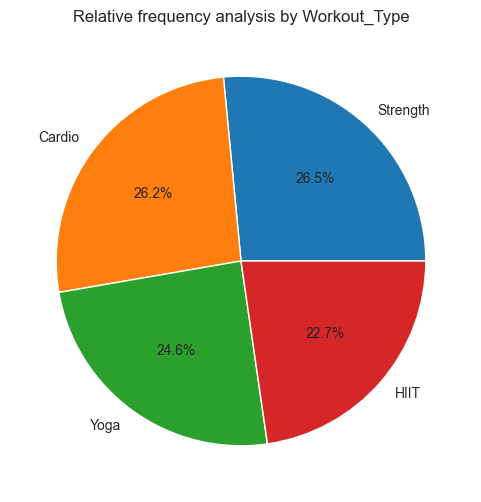

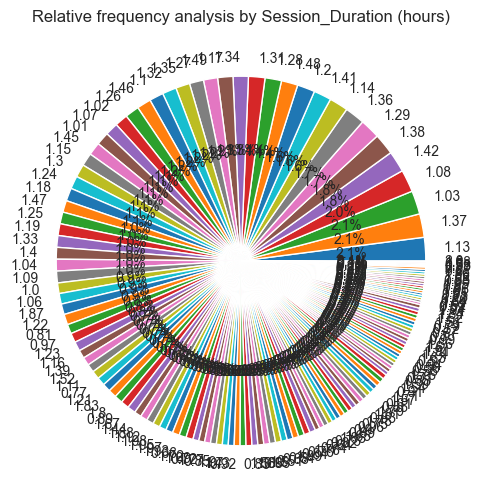

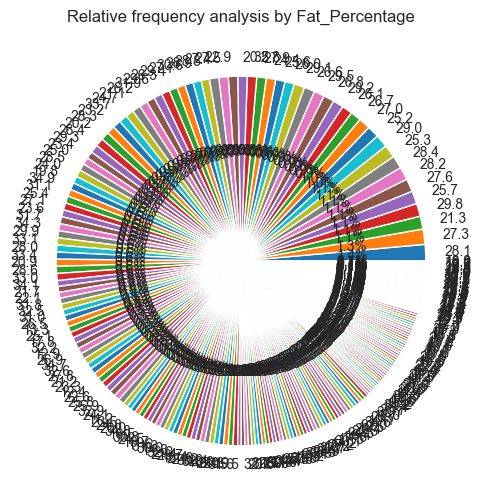

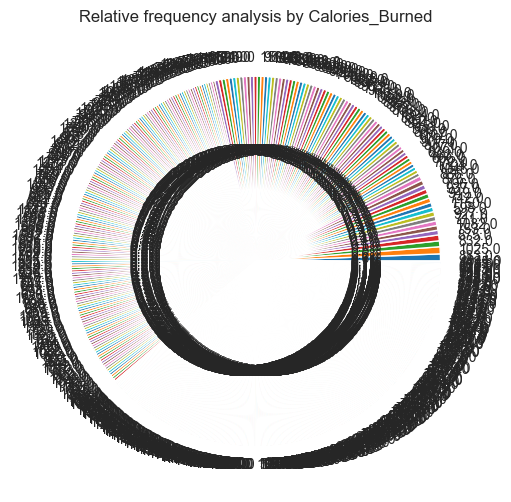

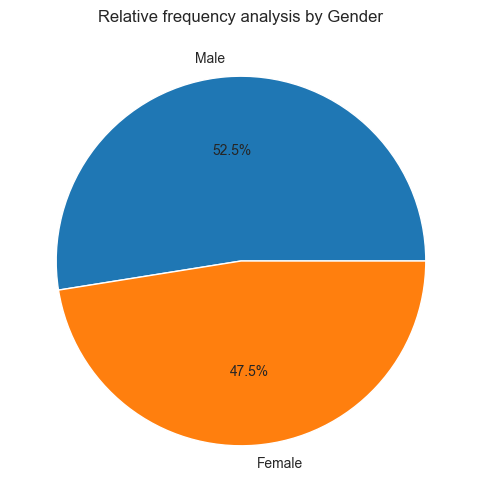

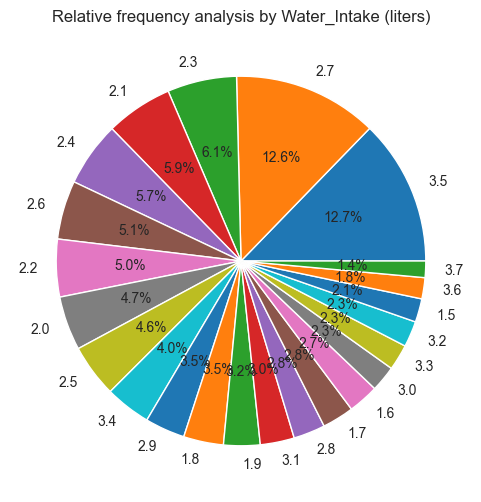

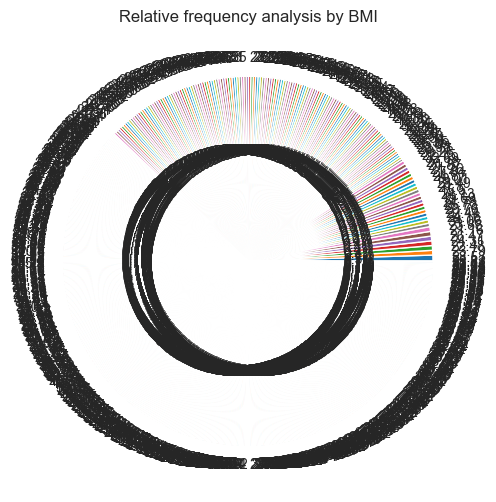

In [129]:
# cycle to plot relative distributions for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

Statistical Analysis for subgroups 

In [132]:
# create groups organized by sex and income
group_sex_income = dataset.groupby(["Workout_Type", "Gender"]).size().reset_index(name = "samples")
print(group_sex_income)

  Workout_Type  Gender  samples
0       Cardio  Female      126
1       Cardio    Male      129
2         HIIT  Female      107
3         HIIT    Male      114
4     Strength  Female      123
5     Strength    Male      135
6         Yoga  Female      106
7         Yoga    Male      133


In [133]:
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Sex')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by Sex and Salary')
    plt.tight_layout()
    plt.show()

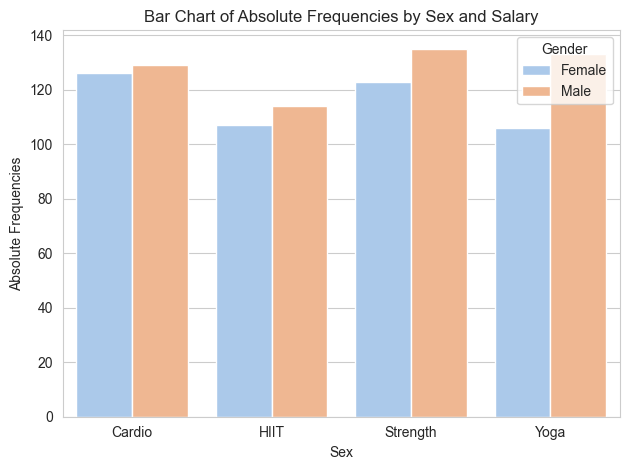

In [136]:
plot_absfreq_groups(group_sex_income, "Workout_Type", "Gender")

In [137]:
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " with salary " + group[g2]
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by Sex and Salary')
    plt.show()

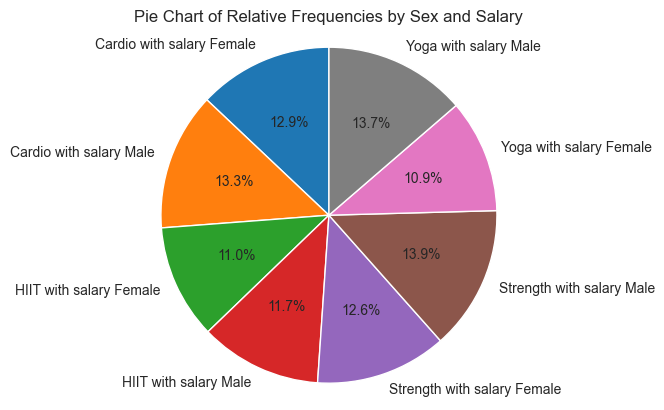

In [ ]:
plot_relfreq_groups(group_sex_income, "Workout_Type", "Gender")